# Cats vs Dogs
- 고양이인지 강아지인지 이진분류
- 전이 학습 17과 비교

## Import

In [1]:
!pip install --q ipython-autotime
%load_ext autotime

time: 395 µs (started: 2024-07-01 06:27:19 +00:00)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-pastel')
import seaborn as sns

import tensorflow as tf
import keras

time: 15.1 s (started: 2024-07-01 06:27:19 +00:00)


## 데이터 불러오기

In [3]:
#!gdown https://drive.google.com/uc?id=1dC-Kso5FonYWtbxtJnJ8_dxO_Jlo8weR

time: 264 µs (started: 2024-07-01 06:27:34 +00:00)


In [4]:
#!unzip cats_and_dogs.zip

time: 220 µs (started: 2024-07-01 06:27:34 +00:00)


In [5]:
data_root = '/content/cats_and_dogs'
train_dir = data_root + '/train'
test_dir = data_root + '/test'

time: 442 µs (started: 2024-07-01 06:27:34 +00:00)


In [6]:
class_name = ['cats', 'dogs']

time: 329 µs (started: 2024-07-01 06:27:34 +00:00)


In [7]:
import os

train_cats_fnames = os.listdir(train_dir + '/cats')
train_dogs_fnames = os.listdir(train_dir + '/dogs')

time: 4.1 ms (started: 2024-07-01 06:27:34 +00:00)


In [8]:
import PIL

X_train = []
y_train = []

for fname in train_cats_fnames:
    image = PIL.Image.open(train_dir + '/cats/' + fname)
    image = image.resize((224,224))
    arr = np.array(image)
    X_train.append(arr)
    y_train.append(0)

for fname in train_dogs_fnames:
    image = PIL.Image.open(train_dir + '/dogs/' + fname)
    image = image.resize((224,224))
    arr = np.array(image)
    X_train.append(arr)
    y_train.append(1)

time: 21.2 s (started: 2024-07-01 06:27:34 +00:00)


In [9]:
print(len(X_train),len(y_train))

2600 2600
time: 4.31 ms (started: 2024-07-01 06:27:55 +00:00)


In [10]:
X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape, y_train.shape)

(2600, 224, 224, 3) (2600,)
time: 252 ms (started: 2024-07-01 06:27:55 +00:00)


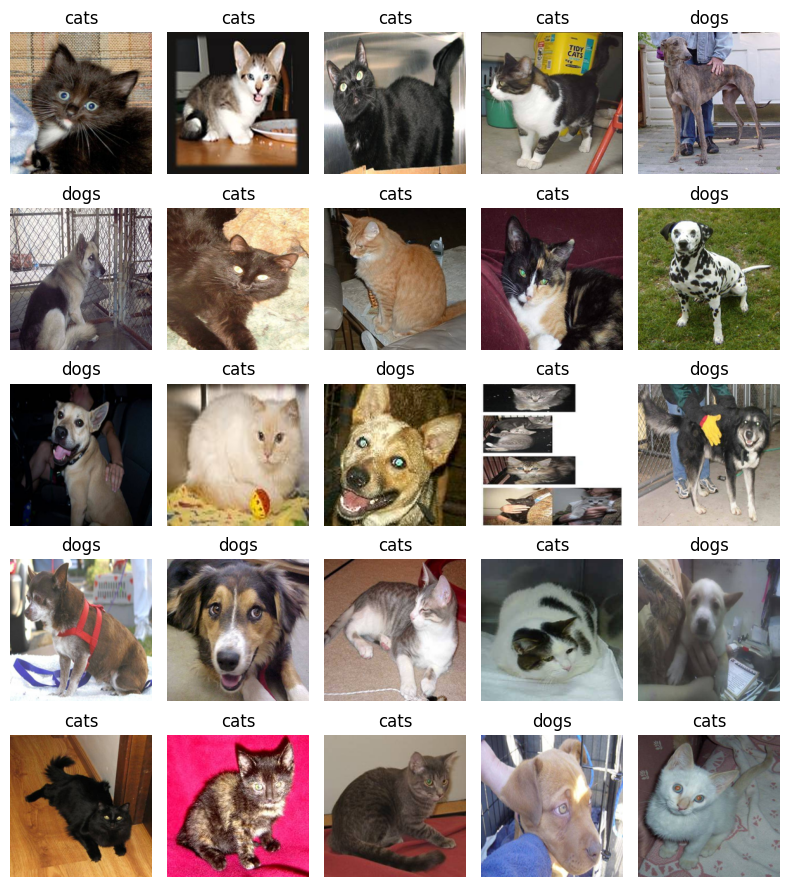

time: 4.27 s (started: 2024-07-01 06:27:56 +00:00)


In [11]:
np.random.seed(42)
sample = np.random.randint(2600, size = 25)
sample

plt.figure(figsize=(8,9))

for i, idx in enumerate(sample):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
    plt.title(class_name[y_train[idx]])
plt.tight_layout()
plt.show()

## 학습, 검증 데이터 분리

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(2080, 224, 224, 3) (2080,)
(520, 224, 224, 3) (520,)
time: 673 ms (started: 2024-07-01 06:28:00 +00:00)


In [13]:
sum(y_train)

1034

time: 18.7 ms (started: 2024-07-01 06:28:01 +00:00)


## 전처리

### X 값 스케일링

In [14]:
X_train_s = X_train.astype('float') / 255.
X_val_s = X_val.astype('float') / 255.

time: 1.59 s (started: 2024-07-01 06:28:01 +00:00)


## Model 학습

In [15]:
X_train_s.shape

(2080, 224, 224, 3)

time: 10.5 ms (started: 2024-07-01 06:28:02 +00:00)


### Transfer learning - VGG16

In [16]:
from keras.applications import VGG16

base_model = VGG16(include_top=False, weights="imagenet", input_shape=(224,224,3))

base_model.trainable = False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
from keras import layers

model = keras.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                32832     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 27593153 (105.26 MB)
Trainable params: 128

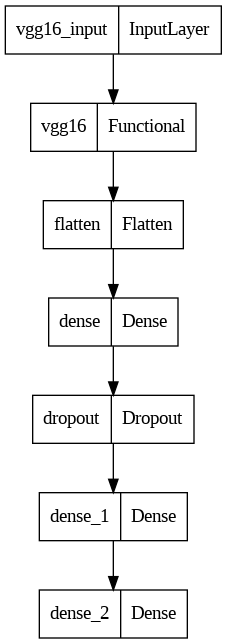

time: 472 ms (started: 2024-07-01 06:28:05 +00:00)


In [18]:
keras.utils.plot_model(model)

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

time: 54.5 ms (started: 2024-07-01 06:28:05 +00:00)


In [20]:
from keras import callbacks

es = callbacks.EarlyStopping(monitor='val_loss', patience=5)
ckpt_path = './temp/cats_dogs/ckpt'
ckpt = callbacks.ModelCheckpoint(filepath = ckpt_path, save_best_only=True)

time: 864 µs (started: 2024-07-01 06:28:05 +00:00)


In [21]:
EPOCHS = 15
BATCH_SIZE = 32

history = model.fit(X_train_s,y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    callbacks=[es], validation_data=(X_val_s,y_val))

Epoch 1/15
65/65 [==============================] - 26s 223ms/step - loss: 0.5572 - acc: 0.7942 - val_loss: 0.2888 - val_acc: 0.8731
Epoch 2/15
65/65 [==============================] - 11s 163ms/step - loss: 0.1621 - acc: 0.9337 - val_loss: 0.2480 - val_acc: 0.9096
Epoch 3/15
65/65 [==============================] - 11s 164ms/step - loss: 0.1349 - acc: 0.9423 - val_loss: 0.2707 - val_acc: 0.9058
Epoch 4/15
65/65 [==============================] - 11s 164ms/step - loss: 0.0592 - acc: 0.9769 - val_loss: 0.2754 - val_acc: 0.9212
Epoch 5/15
65/65 [==============================] - 11s 165ms/step - loss: 0.0296 - acc: 0.9923 - val_loss: 0.2535 - val_acc: 0.9327
Epoch 6/15
65/65 [==============================] - 11s 167ms/step - loss: 0.0125 - acc: 0.9981 - val_loss: 0.2925 - val_acc: 0.9250
Epoch 7/15
65/65 [==============================] - 11s 168ms/step - loss: 0.0161 - acc: 0.9952 - val_loss: 0.4060 - val_acc: 0.9019
time: 1min 35s (started: 2024-07-01 06:28:05 +00:00)


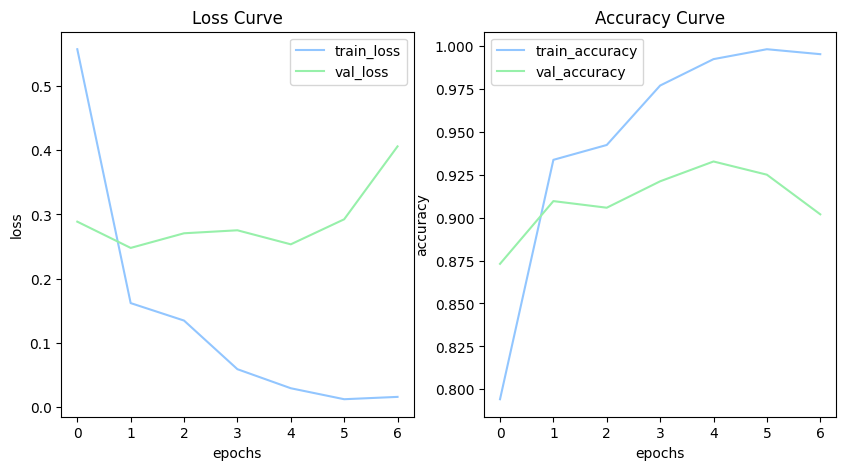

time: 446 ms (started: 2024-07-01 06:29:41 +00:00)


In [22]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'],hist['loss'],label='train_loss')
    plt.plot(hist['epoch'],hist['val_loss'],label='val_loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'],hist['acc'],label='train_accuracy')
    plt.plot(hist['epoch'],hist['val_acc'],label='val_accuracy')
    plt.title('Accuracy Curve')
    plt.legend()

    plt.show()

plot_history(history)

## Test data 예측

### Test data 전처리

In [23]:
test_cats_fnames = os.listdir(test_dir + '/cats')
test_dogs_fnames = os.listdir(test_dir + '/dogs')

time: 1.18 ms (started: 2024-07-01 06:29:41 +00:00)


In [24]:
X_test = []
y_test = []

for fname in test_cats_fnames:
    image = PIL.Image.open(test_dir + '/cats/' + fname)
    image = image.resize((224,224))
    arr = np.array(image)
    X_test.append(arr)
    y_test.append(0)

for fname in test_dogs_fnames:
    image = PIL.Image.open(test_dir + '/dogs/' + fname)
    image = image.resize((224,224))
    arr = np.array(image)
    X_test.append(arr)
    y_test.append(1)

time: 1.49 s (started: 2024-07-01 06:29:41 +00:00)


In [25]:
X_test = np.array(X_test)
X_test_s = X_test.astype('float') / 255.
X_test_s.shape

(400, 224, 224, 3)

time: 208 ms (started: 2024-07-01 06:29:42 +00:00)


In [26]:
y_test = np.array(y_test)

time: 513 µs (started: 2024-07-01 06:29:43 +00:00)


### 예측

In [27]:
y_pred = model.predict(X_test_s)

13/13 [==============================] - 6s 453ms/step
time: 11.2 s (started: 2024-07-01 06:29:43 +00:00)


In [28]:
y_pred = (y_pred > 0.5).astype(int)

time: 663 µs (started: 2024-07-01 06:29:54 +00:00)


accuracy :  0.8775
recall :  0.81
precision :  0.9364161849710982
f1 :  0.8686327077747988
-------------------------------------------------------


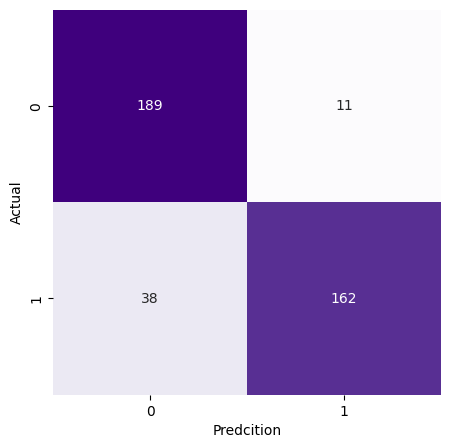

time: 133 ms (started: 2024-07-01 06:29:54 +00:00)


In [29]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def print_metrics(y_true, y_pred, aver='binary'):
    print('accuracy : ', accuracy_score(y_true, y_pred))
    print('recall : ', recall_score(y_true, y_pred, average=aver))
    print('precision : ', precision_score(y_true, y_pred, average=aver))
    print('f1 : ', f1_score(y_true, y_pred, average=aver))
    print('-----'*11)
    cfm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize = (5,5))
    s = sns.heatmap(cfm, annot=True, fmt='d', cbar=False, cmap='Purples')
    s.set(xlabel='Predcition', ylabel='Actual')
    plt.show()

print_metrics(y_test,y_pred)

In [ ]:
# 베스트 체크포인트 로딩
# model.load_weight(ckpt_path)

time: 218 ms (started: 2024-07-01 05:49:43 +00:00)
